# CZ1016 : Assignment

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Setup : Import the Dataset

Dataset : **"smsdata.txt"** (use `read_table` function from Pandas to import)     
After importing, take a quick look at the dataset using the `head` function.

In [2]:
# \t because the columns are separated by a tab
# read_table to read the text file
smsData = pd.read_table('smsdata.txt', sep = "\t", header = None)
smsData.sample(n=10)

,0,1
2323,good,Should I be stalking u?
1285,good,But if she.s drinkin i'm ok.
3415,good,No pic. Please re-send.
1627,good,Dear how you. Are you ok?
280,good,All done? All handed in? Celebrations in full ...
2784,good,"Just arrived, see you in a couple days &lt;3"
4554,good,Sun ah... Thk mayb can if dun have anythin on....
3050,good,Lol they don't know about my awesome phone. I ...
1073,spam,Dear U've been invited to XCHAT. This is our f...
43,good,WHO ARE YOU SEEING?


In [3]:
# .columns method can rename columns
smsData.columns = ["label", "text"]
smsData.sample(n=10)

,label,text
5293,good,I donno its in your genes or something
1855,good,They did't play one day last year know even th...
1378,spam,Double Mins & Double Txt & 1/2 price Linerenta...
1473,good,Just sent you an email – to an address with in...
3795,good,"Short But Cute: ""Be a good person, but dont tr..."
463,spam,"UpgrdCentre Orange customer, you may now claim..."
5516,good,"Ya, i'm referin to mei's ex wat... No ah, wait..."
2136,good,"Carlos took a while (again), we leave in a minute"
3921,spam,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...
1592,good,That's my honeymoon outfit. :)


In [4]:
# Basic information about the data
smsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


---

## Solution : Classification

Use the labeled (`good`/`spam`) text messages in `smsData` to build a tree-based binary classifier that is capable of distinguishing `spam` text messages from the `good` ones. You may build a single decision tree or an ensemble (forest), whichever is better in this case. Try both, and find out which one is better.        

In [5]:
smsData.sample(20)

,label,text
4514,spam,Money i have won wining number 946 wot do i do...
4526,good,Cos i was out shopping wif darren jus now n i ...
3565,good,Do you always celebrate NY's with your family ?
2910,spam,URGENT! Your Mobile number has been awarded wi...
1732,good,Lol. Well quality aint bad at all so i aint co...
1149,good,I'm not driving... Raining! Then i'll get caug...
4807,good,Call me when u finish then i come n pick u.
4141,good,Leave it wif me lar... Ü wan to carry meh so h...
5468,spam,URGENT! Last weekend's draw shows that you hav...
3599,good,"Aight, we'll head out in a few"


# Data exploration and feature extraction

In [6]:
# likely need to convert response variable to CATEGORICAL type
# there is only ONE predictor, likely have to extract more relevant predictors for the model
print("Dimensions:", smsData.shape)
print()
print("Data Types:")
print(smsData.dtypes)

Dimensions: (5572, 2)

Data Types:
label    object
text     object
dtype: object


### Visualising the response variable
- imbalanced dataset
- likely will have to balance out the data using SMOTE    

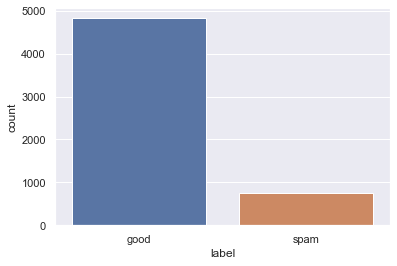

In [7]:
sb.countplot(smsData['label'])


### Extract length of message


In [8]:
# find out if length of message length would be relevant
smsData['msg_len'] = smsData['text'].astype(str).apply(len)


In [9]:
def univariate_plots(target):
    f, axes = plt.subplots(1, 1, figsize=(20, 5))
    sb.boxplot(smsData[target], color = "deepskyblue")
    f, axes = plt.subplots(1, 1, figsize=(20, 5))
    sb.distplot(smsData[target], color = "deepskyblue")
    f, axes = plt.subplots(1, 1, figsize=(20, 5))
    sb.violinplot(smsData[target], color = "deepskyblue")

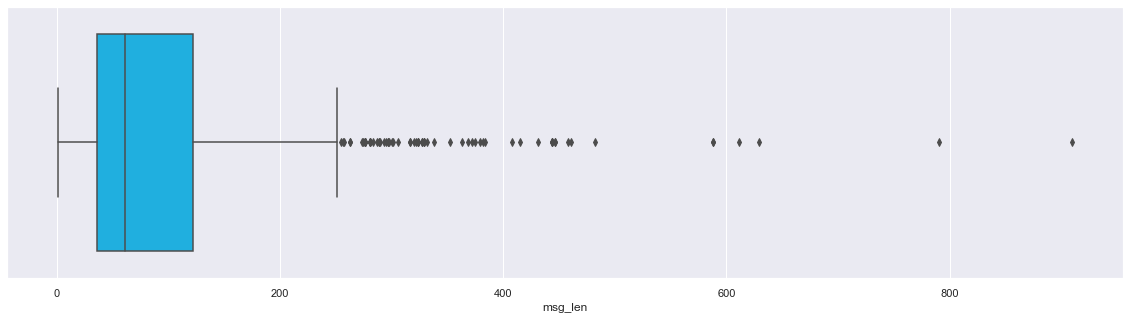

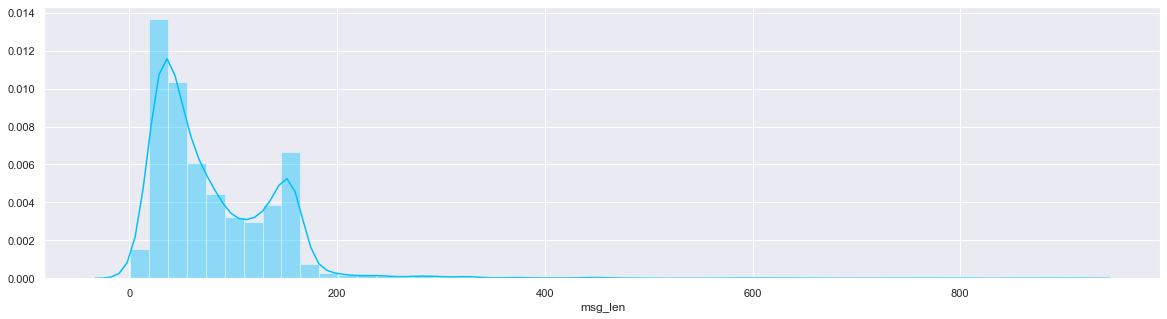

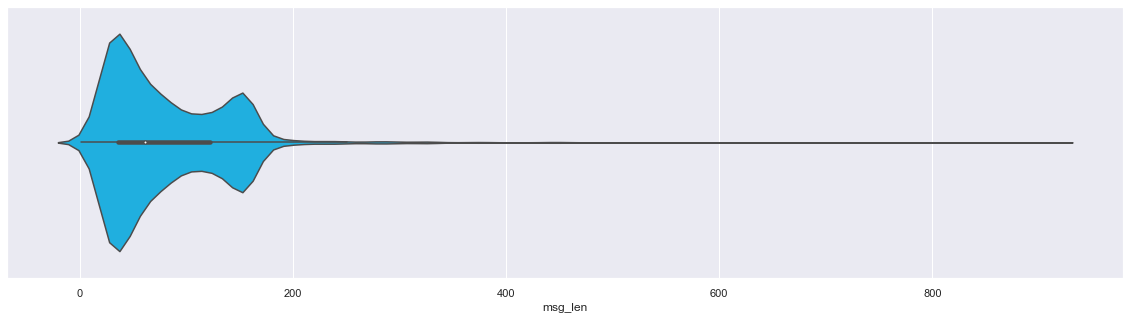

In [10]:
# more than 50% of the rows are less than 100 in length
# there are a bunch of outliers
# there seems to be 2 concentrations on length; one at 50 and the other at 150
univariate_plots('msg_len')


In [11]:
def multivariate_plots(target):
    f, axes = plt.subplots(1, 1, figsize=(15, 5))
    sb.boxplot(x=target,y='label',data=smsData,palette=['turquoise','darkgoldenrod'])
    f, axes = plt.subplots(1, 1, figsize=(15, 5))
    sb.violinplot(x=target,y='label',data=smsData,palette=['turquoise','darkgoldenrod'])

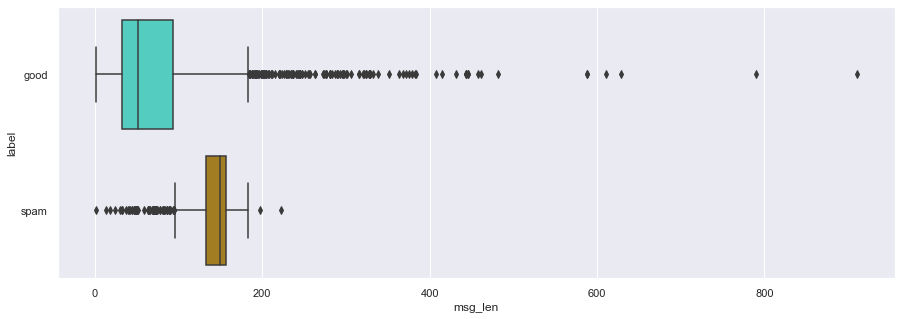

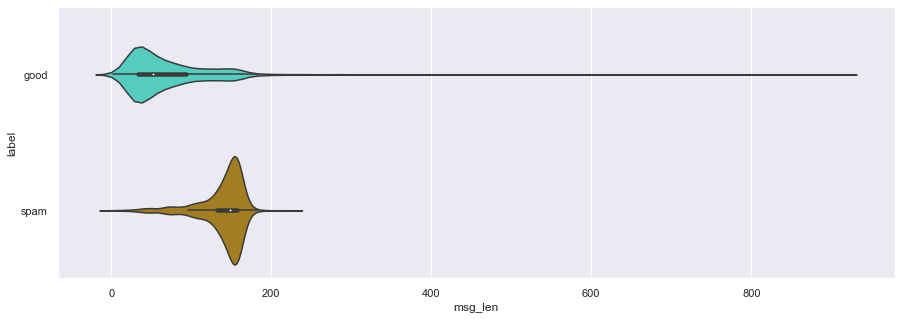

In [12]:
# Observation: most 'spam' length is concentrated at around 150 while 'good' is around 50
# above 200, rows are very likely to be 'good'
multivariate_plots('msg_len')

In [13]:
pd.crosstab(smsData['msg_len'].apply(lambda x: 100<x<200), smsData['label'])

label,good,spam
msg_len,,
False,3846,78
True,979,669


## Extract word counts
   

In [14]:
smsData['word_count'] = smsData['text'].apply(lambda x: len(str(x).split()))

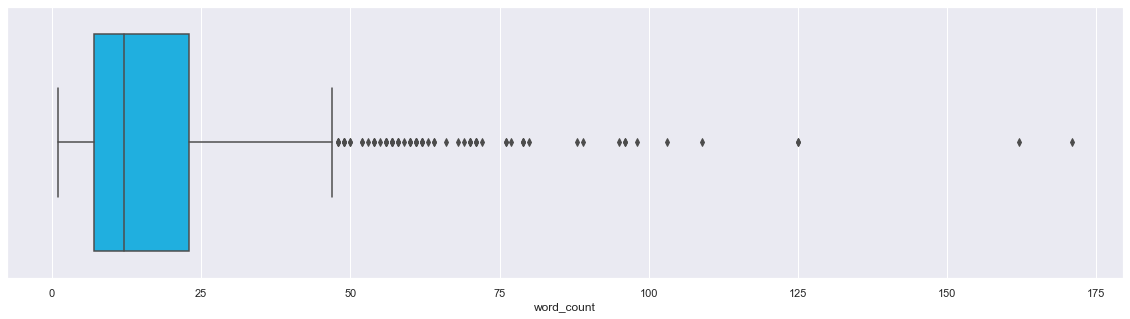

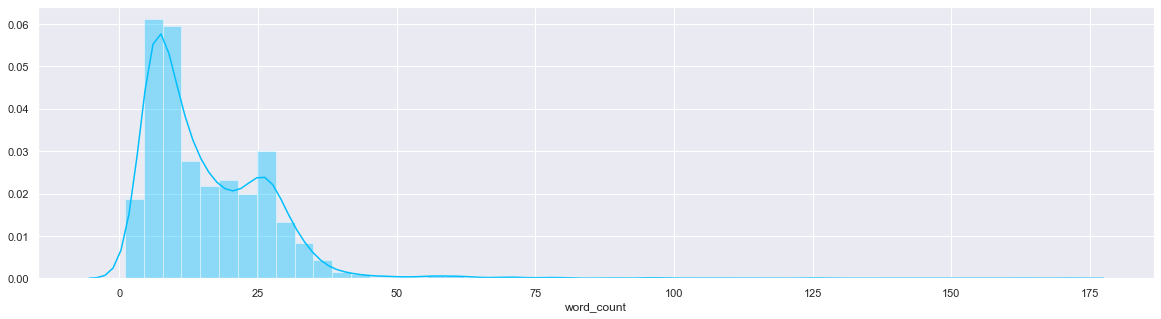

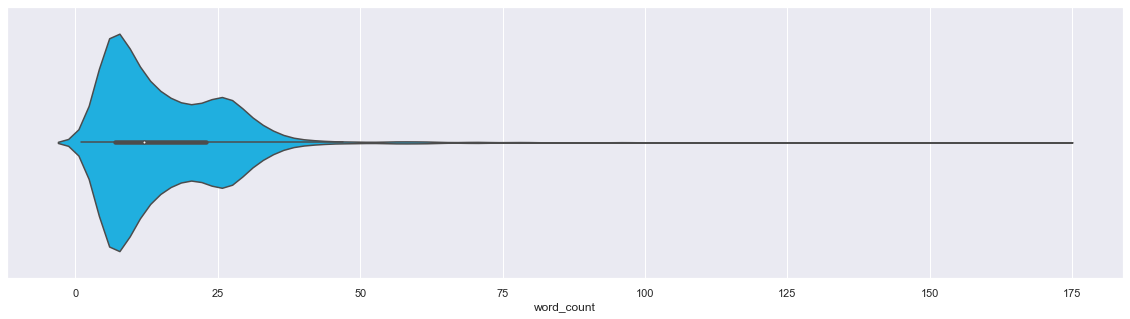

In [15]:
# this feature is correlated with message length, likely take one or the other
univariate_plots('word_count')

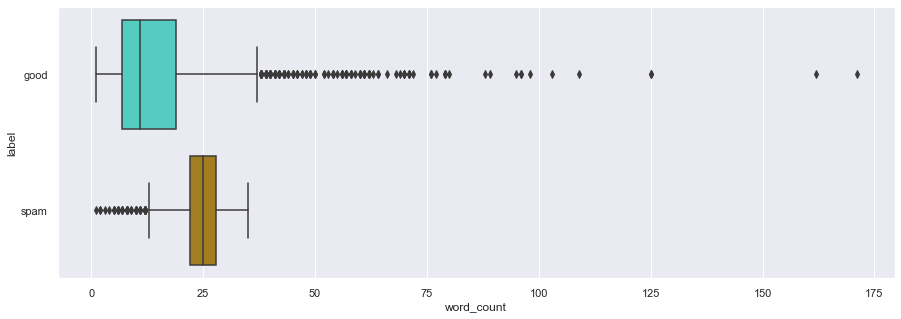

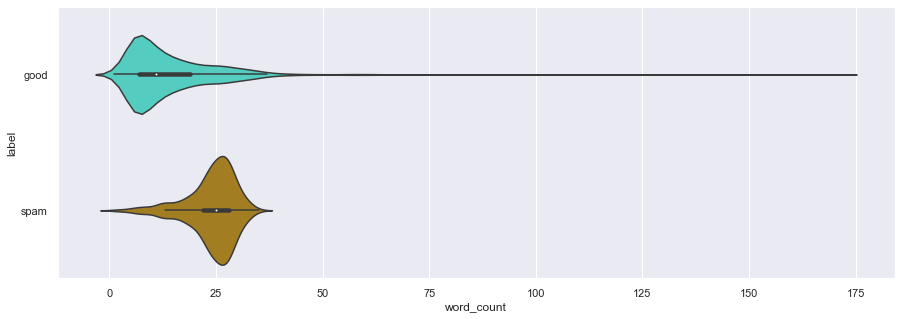

In [16]:
# very similar result with message length
multivariate_plots('word_count')


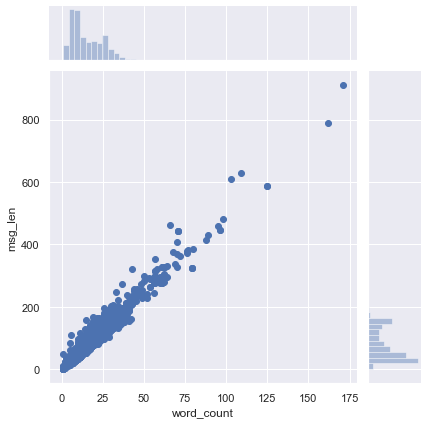

In [17]:
## comapring word count to message length
sb.jointplot(smsData['word_count'],smsData['msg_len'])

In [18]:
# drop word_wount because it is highly correlated to msg_le
smsData=smsData.drop(['word_count'],axis=1)

### Extract number of capital letters
- hypothesis: 'spam' would tend to have more captial letters
   

In [19]:
smsData['num__of_caps']=smsData['text'].apply(lambda x: len([x for x in str(x) if x.isupper()]))

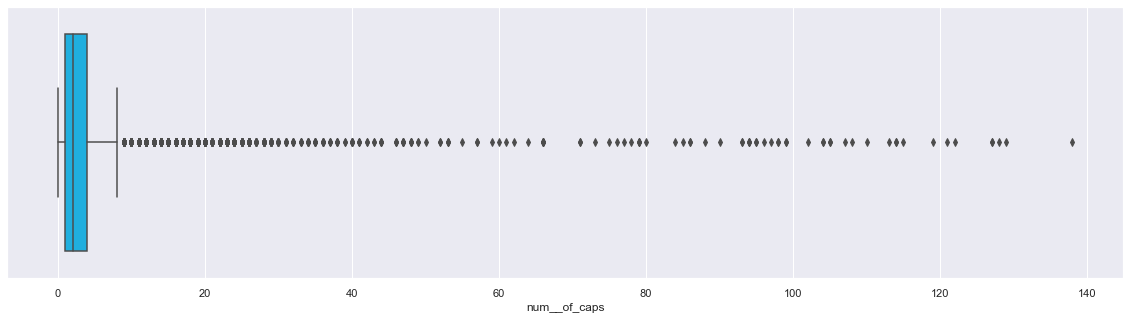

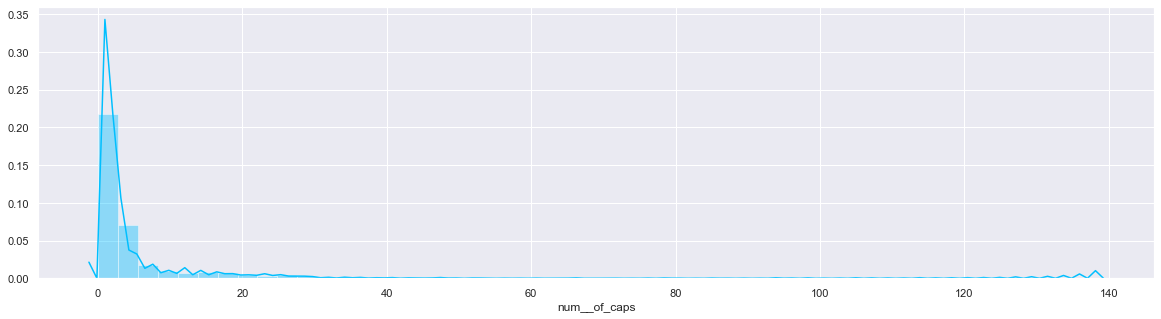

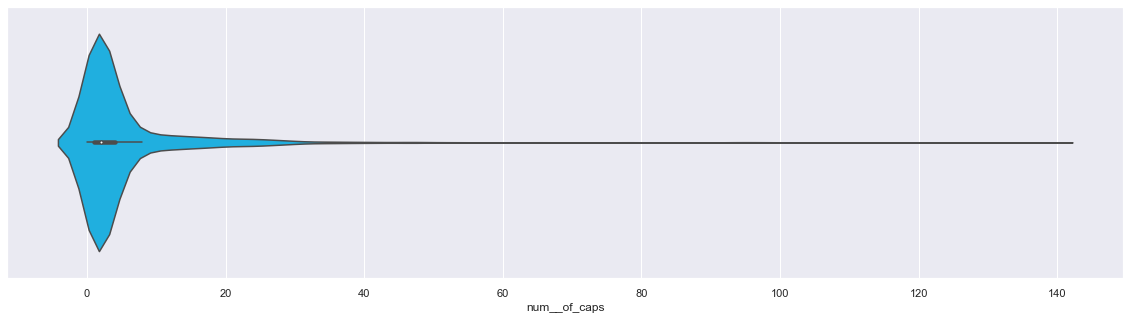

In [20]:
# large majority of rows have less than 10 caps
univariate_plots('num__of_caps')

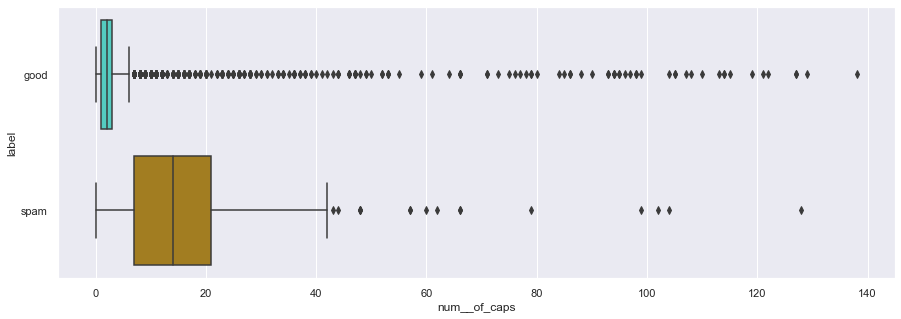

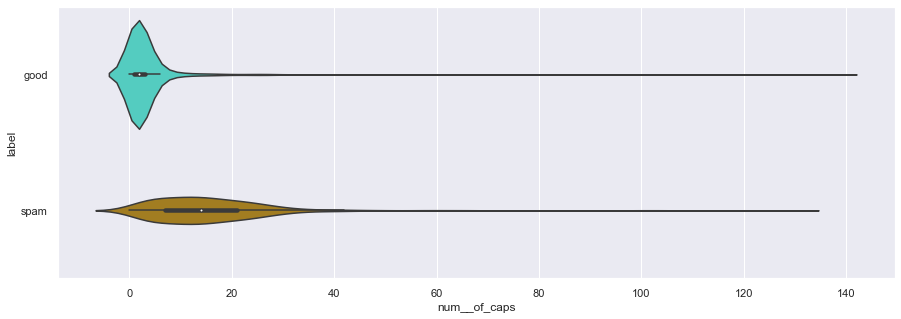

In [21]:
# 'spam' does tend to have more caps, but this doesn't seem to be a very good predictor 
#because there are also lots of 'good' with many caps
multivariate_plots('num__of_caps')

In [22]:
# above 5 caps over 50% are 'spam'
pd.crosstab(smsData['num__of_caps'].apply(lambda x: 5<x), smsData['label'])

label,good,spam
num__of_caps,,
False,4305,135
True,520,612


## Extract number of digits


In [23]:
smsData['num_of_digits']=smsData['text'].apply(lambda x: len([x for x in str(x) if x.isdigit()]))

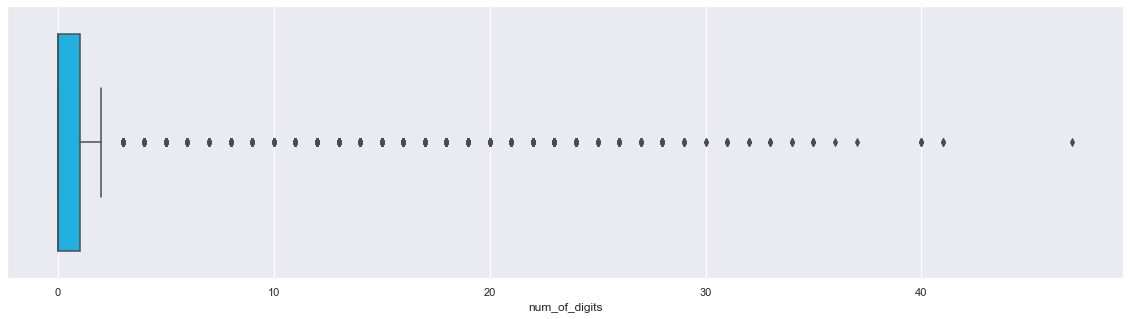

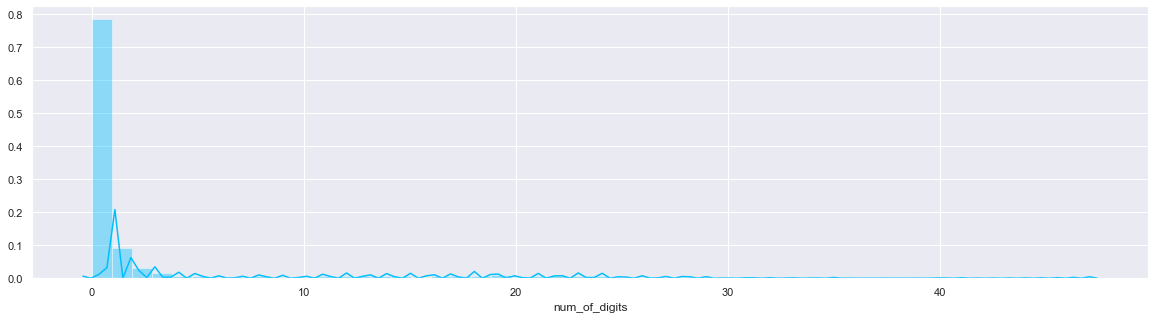

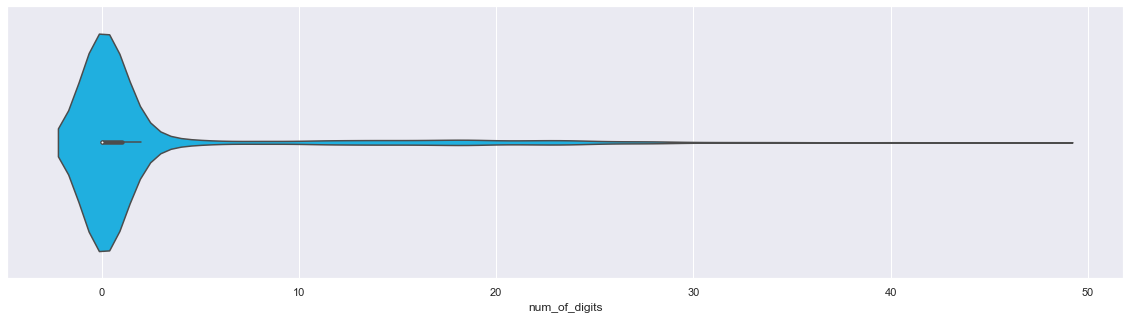

In [24]:
# most rows have little to no digits
univariate_plots('num_of_digits')

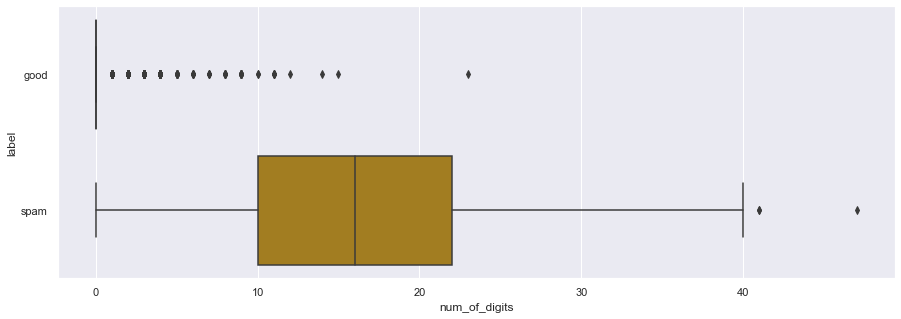

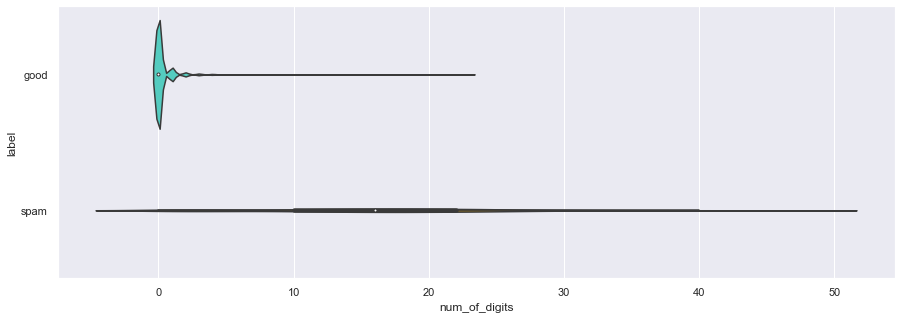

In [25]:
# 'spam' emails tend to have a lot more digits than 'good'
multivariate_plots('num_of_digits')

In [26]:
# there are also 'good' with many digits
#'good' with more than 5 digits
smsData.loc[(smsData['num_of_digits']>10)&(smsData['label']=='good')]

,label,text,msg_len,num__of_caps,num_of_digits
692,good,Sorry to trouble u again. Can buy 4d for my da...,109,4,15
989,good,Yun ah.the ubi one say if ü wan call by tomorr...,160,2,23
2408,good,Solve d Case : A Man Was Found Murdered On &l...,444,44,11
2681,good,Solve d Case : A Man Was Found Murdered On &l...,444,44,11
2933,good,Only 2% students solved this CAT question in '...,183,5,14
3280,good,Solve d Case : A Man Was Found Murdered On &l...,444,44,11
3291,good,My tuition is at 330. Hm we go for the 1120 to...,69,3,11
3462,good,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,4,12
4762,good,It's é only $140 ard...É rest all ard $180 at ...,89,3,11


In [27]:
# above 10 digits, the email is very likely to be 'spam'
pd.crosstab(smsData['num_of_digits'].apply(lambda x: x>10), smsData['label'])

label,good,spam
num_of_digits,,
False,4816,189
True,9,558


### extract number of stopwords
    - although all, data points more than 20 stopwords are 'good', this seems to be a poor indicator
    

In [28]:
from nltk.corpus import stopwords
stop=stopwords.words('english')


In [29]:
smsData['num_of_stopwords']=smsData['text'].apply(lambda x: len([x for x in x.split() if x in stop]))

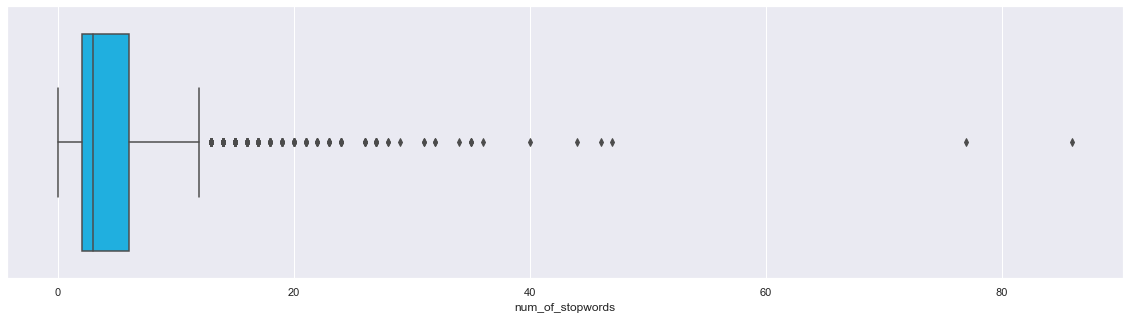

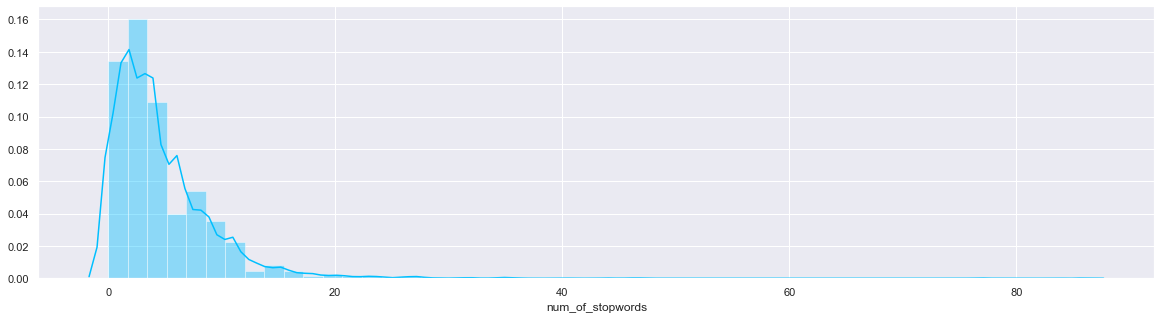

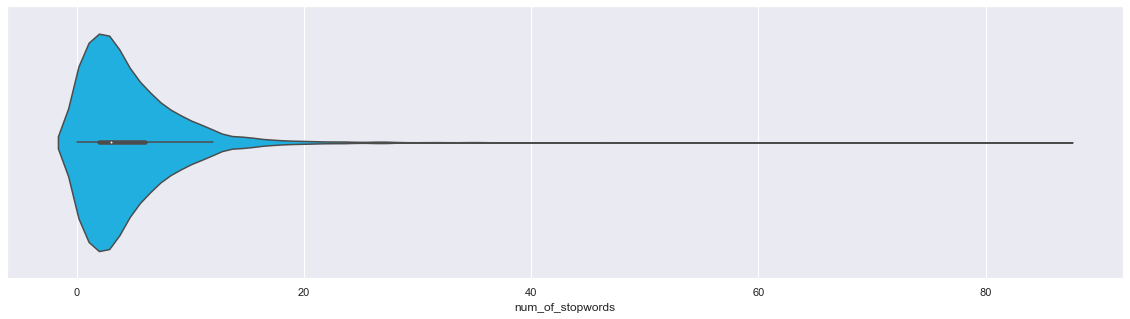

In [30]:
univariate_plots('num_of_stopwords')

In [31]:
# 50% of rows have 2 to 6 stopwords
smsData['num_of_stopwords'].describe()

count    5572.000000
mean        4.596554
std         4.591812
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        86.000000
Name: num_of_stopwords, dtype: float64

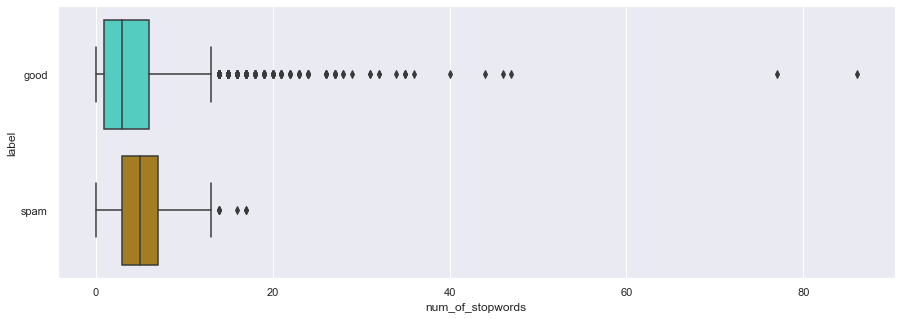

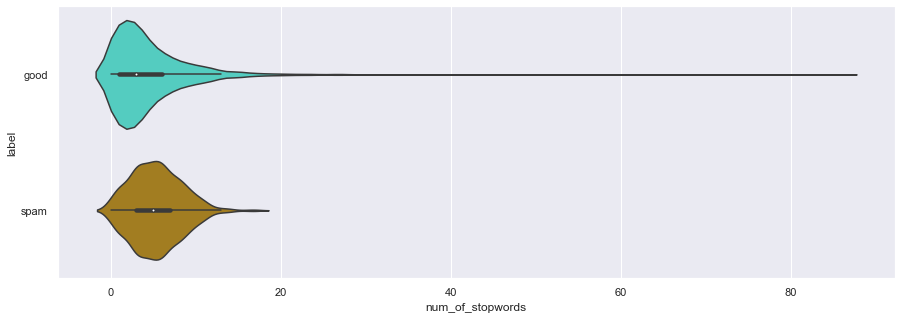

In [32]:
# above 20 stopwords the email is like 'good'
multivariate_plots('num_of_stopwords')

In [33]:
# this feature does not a very good predictor looking at the multivariate plot
smsData=smsData.drop(['num_of_stopwords'],axis=1)

### extract number of 'pounds' sign
- hyppthesis is that pounds sign can indicate 'spam' that is asking for money 

In [34]:
smsData['num_of_pounds']=smsData['text'].apply(lambda x: len([x for x in str(x) if x=='£']))

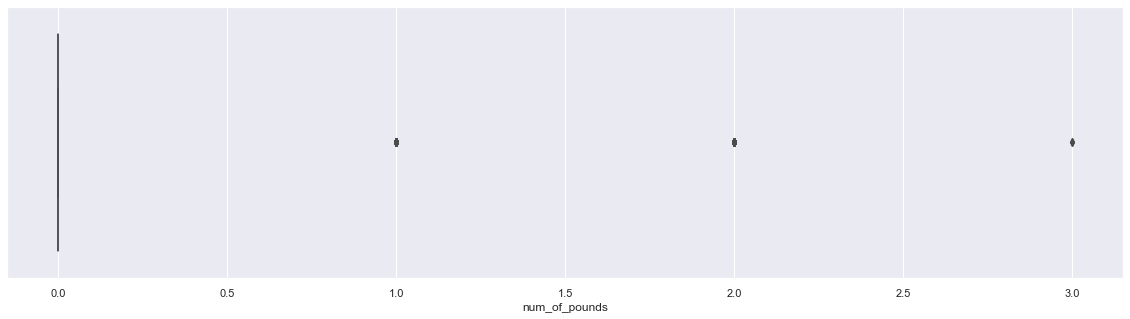

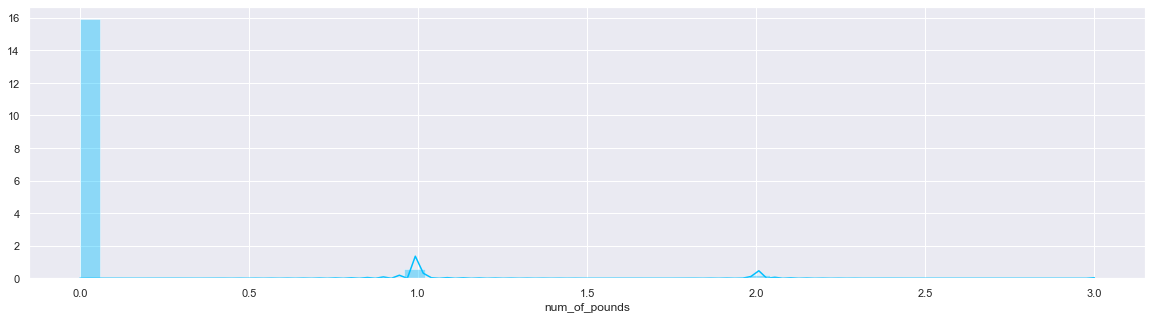

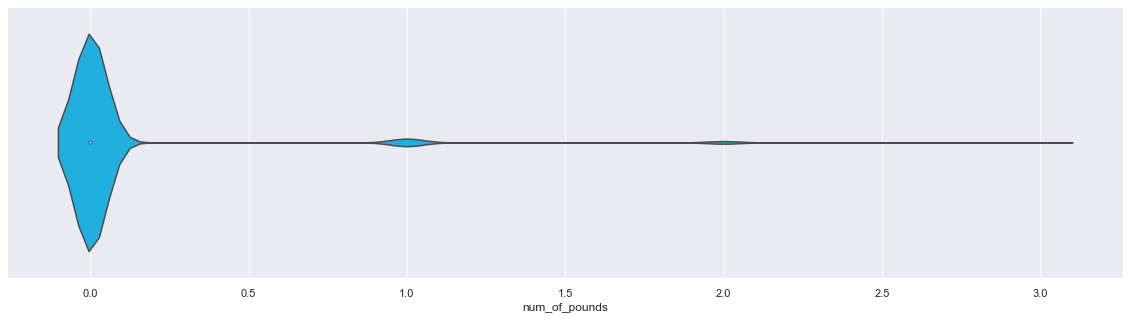

In [35]:
# most rows have no pounds sign
univariate_plots('num_of_pounds')

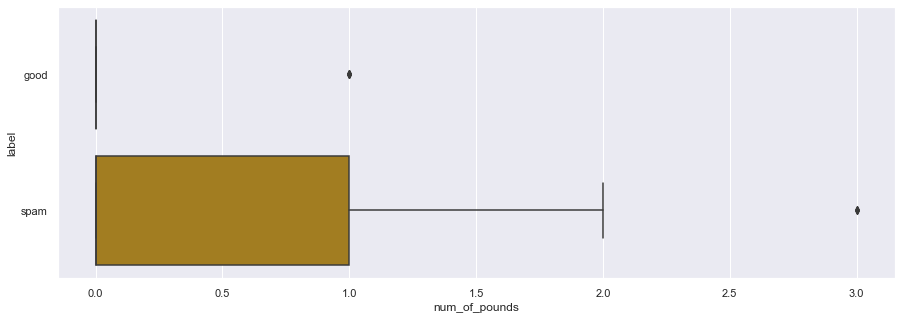

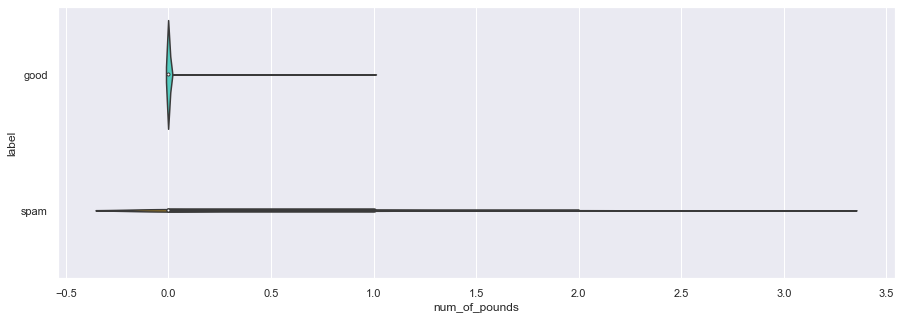

In [36]:
# if there is a pounds sign, it is very likely to be 'spam'
multivariate_plots('num_of_pounds')

In [37]:
# 'good' with pounds sign
smsData.loc[(smsData['num_of_pounds']>0)&(smsData['label']=='good')]

,label,text,msg_len,num__of_caps,num_of_digits,num_of_pounds
1677,good,"Yeah, that's fine! It's £6 to get in, is that ok?",49,2,1,1
1724,good,"Hi Jon, Pete here, Ive bin 2 Spain recently & ...",157,8,8,1
1998,good,"YEH I AM DEF UP4 SOMETHING SAT,JUST GOT PAYED2...",149,113,6,1
3044,good,Your bill at 3 is £33.65 so thats not bad!,42,1,5,1
3736,good,"It‘s £6 to get in, is that ok?",30,1,1,1


In [38]:
# if there is a pounds sign, it is very likely to be 'spam'
pd.crosstab(smsData['num_of_pounds'].apply(lambda x: x>0), smsData['label'])

label,good,spam
num_of_pounds,,
False,4820,494
True,5,253


### extract presence of a link
- hypothesis is that a link would suggest 'spam' that want the victim to click to another website

In [39]:
smsData['link_present']=smsData['text'].apply(lambda x: 'www.' in str(x).lower() or 'http' in str(x).lower())

In [40]:
# indeed if a link is present, it is likely spam. it accounts for a very small percentage of rows though
pd.crosstab(smsData['link_present'], smsData['label'])

label,good,spam
link_present,,
False,4823,640
True,2,107


In [41]:
# 'good' with link present
smsData.loc[(smsData['link_present'])&(smsData['label']=='good'),['text','link_present']]

,text,link_present
2379,"Hi, Mobile no. &lt;#&gt; has added you in th...",True
4773,"Hi, Mobile no. &lt;#&gt; has added you in th...",True


### extract number of exclamations
- hypothesis was that presence of more exclamation mark would indicate 'spam'

In [42]:
smsData['num_of_exclamations']=smsData['text'].apply(lambda x: len([x for x in str(x) if x=='!']))

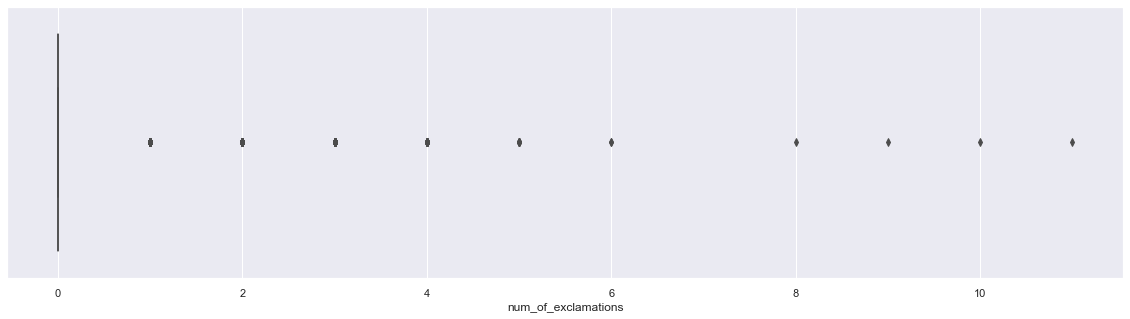

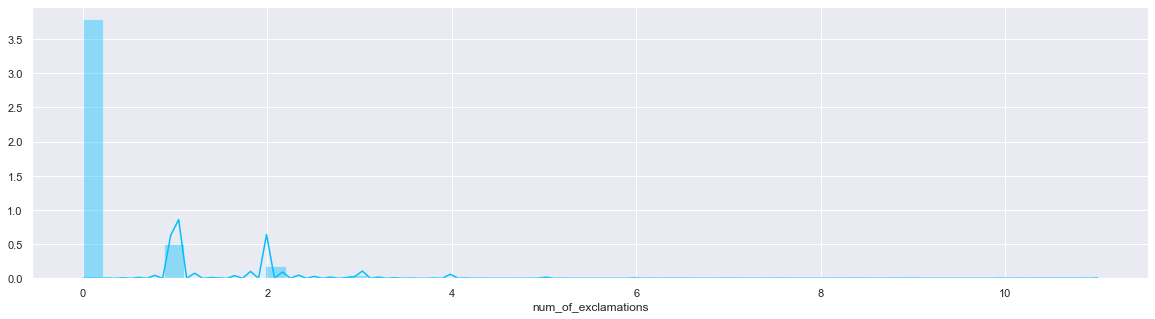

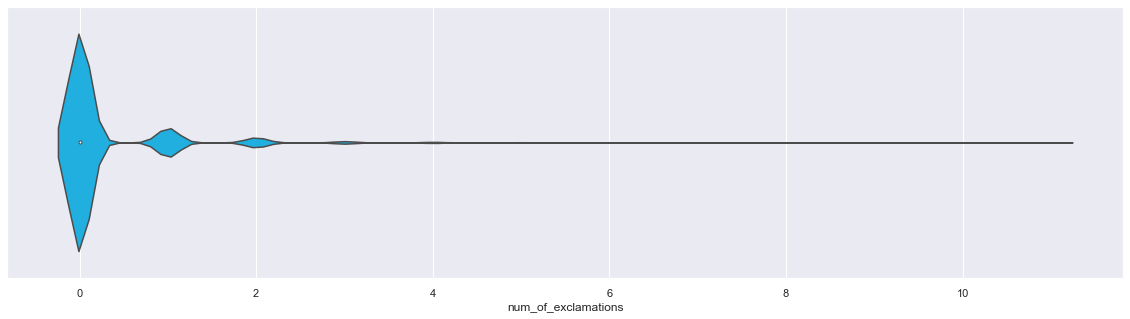

In [43]:
# large majority of emails have little to none
univariate_plots('num_of_exclamations')

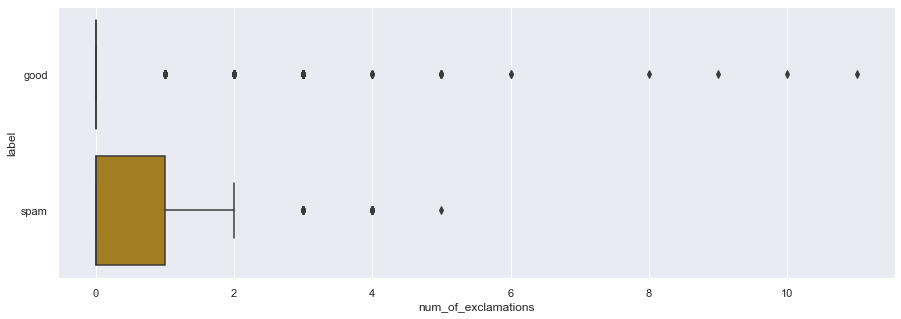

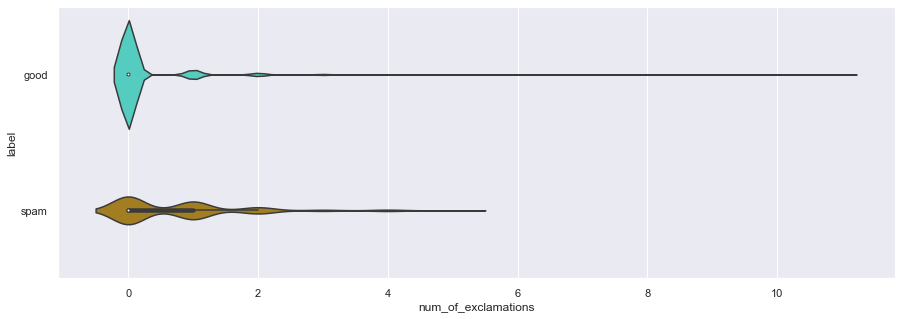

In [44]:
# around 50 % of 'spam' emails do have '!' have there are also quite a number of 'good' with ' !'
multivariate_plots('num_of_exclamations')

In [45]:
# 'good' with exclamations
smsData.loc[(smsData['num_of_exclamations']>0)&(smsData['label']=='good')]

,label,text,msg_len,num__of_caps,num_of_digits,num_of_pounds,link_present,num_of_exclamations
14,good,I HAVE A DATE ON SUNDAY WITH WILL!!,35,26,0,0,False,2
29,good,Ahhh. Work. I vaguely remember that! What does...,64,5,0,0,False,1
31,good,Yeah he got in at 2 and was v apologetic. n ha...,188,5,2,0,False,2
39,good,Hello! How's you and how did saturday go? I wa...,155,4,0,0,False,2
44,good,Great! I hope you like your man well endowed. ...,72,3,0,0,False,1
...,...,...,...,...,...,...,...,...
5465,good,Shall I bring us a bottle of wine to keep us a...,87,4,0,0,False,1
5476,good,Yes princess! I want to please you every night...,74,3,0,0,False,1
5480,good,Have you seen who's back at Holby?!,35,2,0,0,False,1
5494,good,"Cool, we shall go and see, have to go to tip a...",155,4,0,0,False,1


In [46]:
# around 50% of 'spam' have '!', 
pd.crosstab(smsData['num_of_exclamations'].apply(lambda x: x>0), smsData['label'])

label,good,spam
num_of_exclamations,,
False,4263,381
True,562,366


### extract presence of consecutive dots '..'
- looking at the raw data, 'good' emails tend to have this, let's take a look
    
   

In [47]:
smsData['consecutiveDots']=smsData['text'].apply(lambda x: '..' in str(x))


In [48]:
# emails are very likely to be 'good' when '..' is present
pd.crosstab(smsData['consecutiveDots'], smsData['label'])

label,good,spam
consecutiveDots,,
False,3702,730
True,1123,17


In [49]:
# 'spam' with consecutive dots
smsData.loc[(smsData['consecutiveDots'])&(smsData['label']=='spam')]

,label,text,msg_len,num__of_caps,num_of_digits,num_of_pounds,link_present,num_of_exclamations,consecutiveDots
1366,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,101,29,23,0,False,0,True
1374,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In...",151,7,25,0,False,0,True
1734,spam,"Hi, this is Mandy Sullivan calling from HOTMIX...",223,14,23,1,False,0,True
2003,spam,TheMob>Yo yo yo-Here comes a new selection of ...,143,9,0,0,False,1,True
2247,spam,Hi ya babe x u 4goten bout me?' scammers getti...,181,4,1,0,False,1,True
2313,spam,tddnewsletter@emc1.co.uk (More games from TheD...,114,10,1,0,False,0,True
2680,spam,"New Tones This week include: 1)McFly-All Ab..,...",136,14,3,0,False,0,True
3010,spam,Update_Now - 12Mths Half Price Orange line ren...,110,11,19,0,False,0,True
3167,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,101,29,23,0,False,0,True
3501,spam,Dorothy@kiefer.com (Bank of Granite issues Str...,156,44,6,0,False,0,True


### extract happy faces
- hypothesis is that happy faces indicate non-sinister intent which are  'good' emails

In [50]:
# 100% of emails with happy faces are 'good'
smsData['happy_face']=smsData['text'].apply(lambda x: ':)' in str(x) or ':-)' in str(x))
pd.crosstab(smsData['happy_face'], smsData['label'])

label,good,spam
happy_face,,
False,4529,747
True,296,0


## Number of question marks

In [51]:
smsData['question_mark']=smsData['text'].apply(lambda x: len([i for i in str(x) if i=='?']))


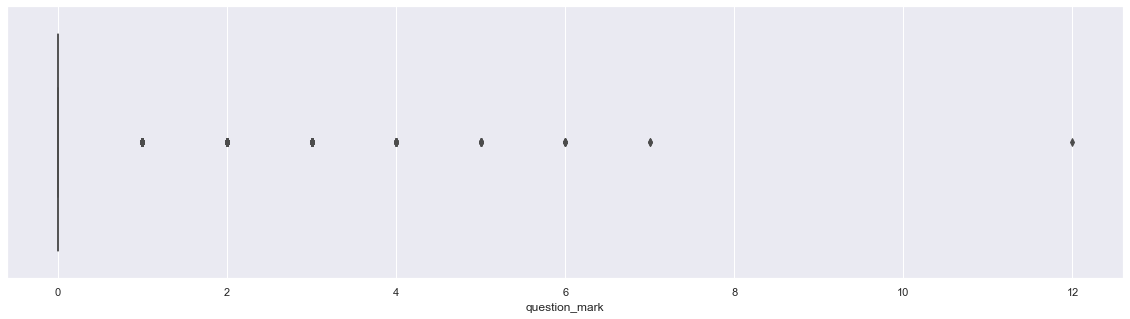

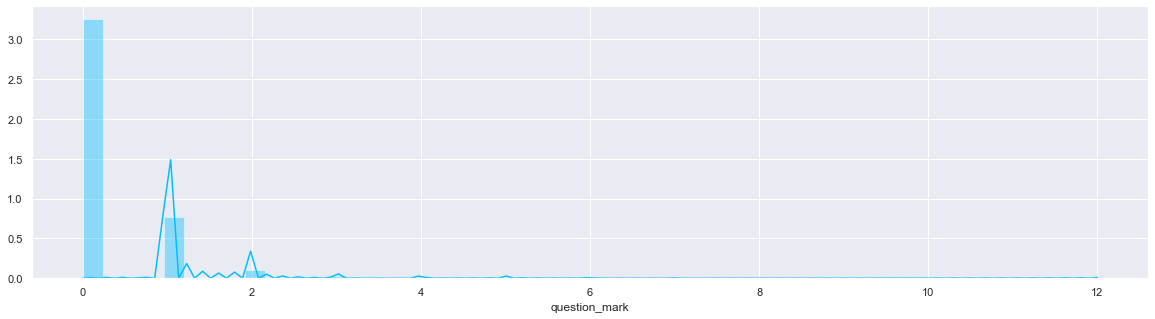

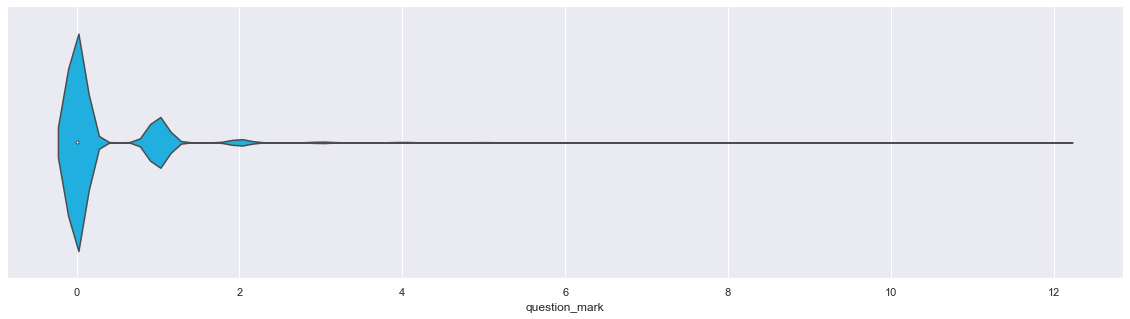

In [52]:
# majority of rows have none, though there are plenty of outliers
univariate_plots('question_mark')

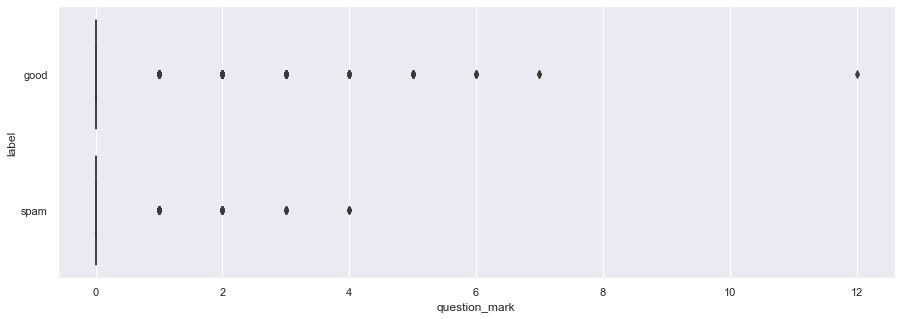

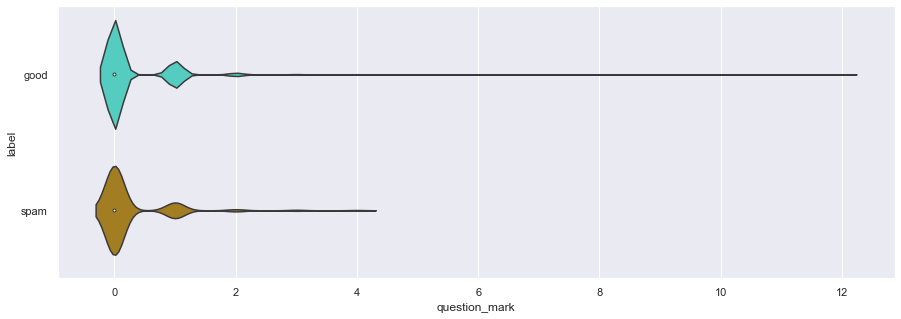

In [53]:
## does seem to predict 'good' when quantity is high
multivariate_plots('question_mark')

In [54]:
## dropped this feature because it is not a significant enough predictor 
smsData=smsData.drop(['question_mark'],axis=1)

In [55]:
new_features=[col for col in smsData.columns if( col not in ['label','text'])]
print("Additional features extracted: ")
for i,col in enumerate(new_features):
    print(i+1,col)

Additional features extracted: 
1 msg_len
2 num__of_caps
3 num_of_digits
4 num_of_pounds
5 link_present
6 num_of_exclamations
7 consecutiveDots
8 happy_face


# Pre-processing

### convert text to lower case
- x.split() splits by empty space, so we have a LIST OF WORDS
- " ".join converts this list back into a SENTENCE

In [56]:
smsData['text']=smsData['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### extract only alphabets
- special characters and all punctuations would be removed
- [^a-zA-Z] means to exclude a-z and A-Z

In [57]:
import re
smsData['text']=smsData['text'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

### remove punctuations(disabled)
- this step is already account in the previous cell
- using .replace method


### remove stopwords
-ie unimportant words


In [58]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
smsData['text']=smsData['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


### take only most frequent words
- rare words are just add to noise
- Dilemma: at what point do we call a word rare and remove it?

- Note: we should keep mopst FREQUENT words because some of them like ' call' or ' free' help predict 'spam'

In [59]:
freq=pd.Series(' '.join(smsData['text']).split()).value_counts()
most_freq=freq[:300]


In [60]:
smsData['text']=smsData['text'].apply(lambda x: " ".join(x for x in x.split() if x in most_freq))

### remove leftover single letters
- it seems, there are single letters scattered around
- remove them because they likely do not add any meaning

In [61]:
smsData['text']=smsData['text'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))

### lemmatization
- convert words to roots

In [62]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

smsData['text']=smsData['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(x) for word in x.split()]))

### creating the bag of words model
- a sparse matrix where each column represents a word

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(smsData['text']).toarray()
X=pd.DataFrame(X)

In [64]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# adding the engineered features
X=pd.concat([X,smsData[new_features] ], axis=1, sort=False)

In [66]:
# extracting the response variable
y=smsData['label']

In [67]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Classification models

### decision tree model

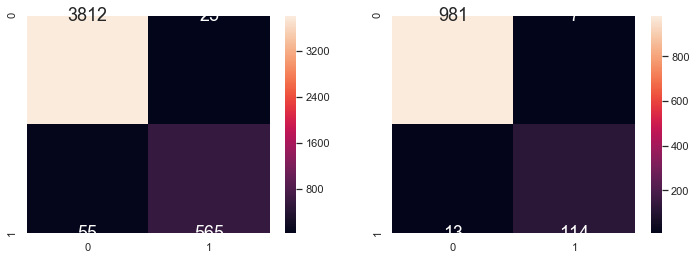

In [330]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# training and fitting the model
dtClassifier=DecisionTreeClassifier(max_depth=3)
dtClassifier.fit(X_train,y_train)

# predicting train and test set
y_train_pred = dtClassifier.predict(X_train)
y_test_pred = dtClassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [331]:
def print_metrics(actual, predicted):
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(actual, predicted)
    TN=cm[0][0]
    TP=cm[1][1]
    FP=cm[0][1]
    FN=cm[1][0]
    precision=TP/(FP+TP)
    recall=TP/(FN+TP)
    F1= 2*(recall * precision) / (recall + precision)
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    print('{0:<15} {1}'.format("Accuracy:",accuracy))
    print('{0:<15} {1}'.format("Precision:",precision))
    print('{0:<15} {1}'.format("Recall:",recall))
    print('{0:<15} {1}'.format("F1:",F1))

- decision tree model performs very well in training set, over 89% for all metrics
- however, there is a slight drop of performance in the test set, likely an indication of OVERFITTING

In [332]:
print("Performance on training set:")
print_metrics(y_train, y_train_pred)
print()
print("Performance on test set:")
print_metrics(y_test, y_test_pred)

Performance on training set:
Accuracy:       0.9820507067534215
Precision:      0.9576271186440678
Recall:         0.9112903225806451
F1:             0.9338842975206612

Performance on test set:
Accuracy:       0.9820627802690582
Precision:      0.9421487603305785
Recall:         0.8976377952755905
F1:             0.9193548387096775


- plotting the tree, we see that num_of_digits, presence of link and presence of '..' are the most significant predictors

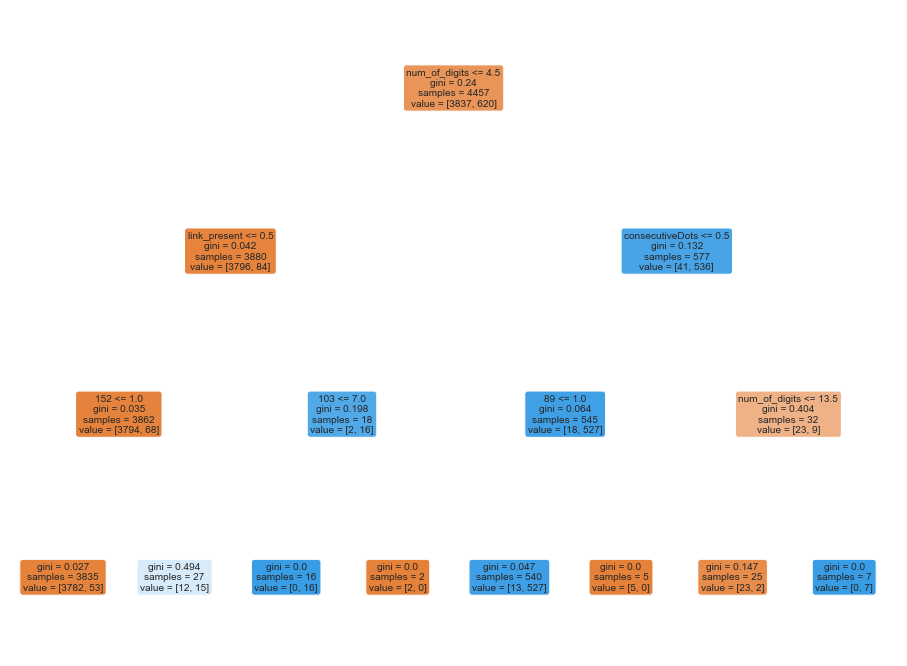

In [333]:
# Plot the Decision Tree
# Import the function plot_tree
from sklearn.tree import plot_tree

# Plot the Decision Tree model
f, axes = plt.subplots(1, 1, figsize=(16, 12))

plot_tree(dtClassifier, filled=True, rounded = True, 
          feature_names=pd.DataFrame(X_train).columns)
plt.show()

- let's increase the max_depth

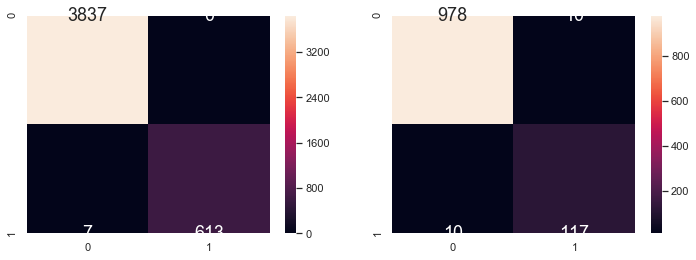

In [334]:
# training and fitting the model
dtClassifier=DecisionTreeClassifier(max_depth=20)
dtClassifier.fit(X_train,y_train)

# predicting train and test set
y_train_pred = dtClassifier.predict(X_train)
y_test_pred = dtClassifier.predict(X_test)

from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


- with max_depth=20, performance in the training set is over 98% for all metrics
- however, there is OVERFITTING, because we see a drop in performance in the test set

In [335]:
print("Performance on training set:")
print_metrics(y_train, y_train_pred)
print()
print("Performance on test set:")
print_metrics(y_test, y_test_pred)

Performance on training set:
Accuracy:       0.9984294368409243
Precision:      1.0
Recall:         0.9887096774193549
F1:             0.994322789943228

Performance on test set:
Accuracy:       0.9820627802690582
Precision:      0.9212598425196851
Recall:         0.9212598425196851
F1:             0.9212598425196851


## random forest model

In [336]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(max_depth=20,n_estimators= 1000)
                                       
# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [337]:
# predicting train and test set
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)


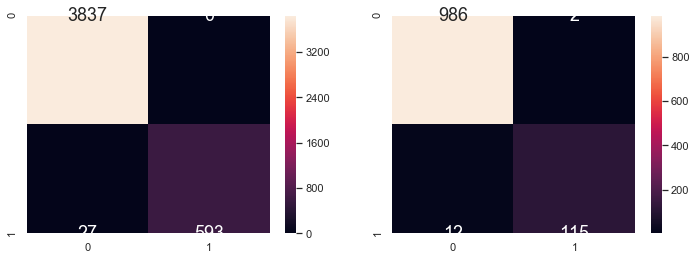

In [338]:
from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


- precision is very high, which is good because we don't want user emails to be falsely predicted as spam
- compared to decision tree performance did not drop as much, indicating less OVERFITTING
- recall in the test set is still at 90% so there are still 10% 'spam' not detected

In [339]:
print("Performance on training set:")
print_metrics(y_train, y_train_pred)
print()
print("Performance on test set:")
print_metrics(y_test, y_test_pred)

Performance on training set:
Accuracy:       0.9939421135292797
Precision:      1.0
Recall:         0.9564516129032258
F1:             0.9777411376751854

Performance on test set:
Accuracy:       0.9874439461883409
Precision:      0.9829059829059829
Recall:         0.905511811023622
F1:             0.9426229508196721


### using GridSearch
- best parameters for the random forest are as follows:
    {'max_depth': 25,
     'min_samples_leaf': 1,
     'min_samples_split': 2,
     'n_estimators': 500}

## applying best parameters from gridSearch

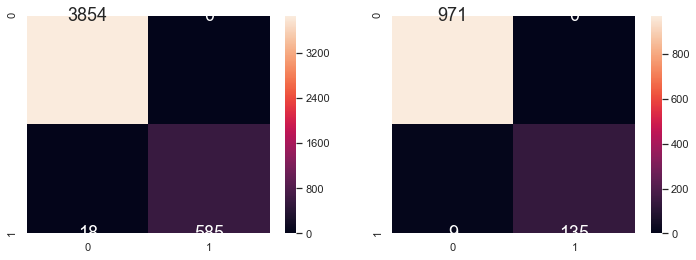

In [340]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(max_depth= 25, 
                                 min_samples_leaf= 1, 
                                 min_samples_split=2, 
                                 n_estimators=500)
                                       
# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

# predicting train and test set
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

- using the best parameters, we see an improvement in the recall compared to previous models

In [341]:
print("Performance on training set:")
print_metrics(y_train, y_train_pred)
print()
print("Performance on test set:")
print_metrics(y_test, y_test_pred)

Performance on training set:
Accuracy:       0.9959614090195199
Precision:      1.0
Recall:         0.9701492537313433
F1:             0.9848484848484849

Performance on test set:
Accuracy:       0.9919282511210762
Precision:      1.0
Recall:         0.9375
F1:             0.967741935483871


### upsampling(disabled)
- SMOTE used instead

### SMOTE
- A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or 
Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and 
synthetic data we can use for training our model

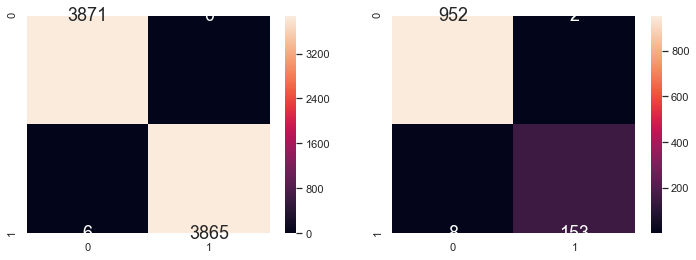

In [68]:
from imblearn.over_sampling import SMOTE

# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

sm = SMOTE(random_state=20, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

# using best parameters
rforest = RandomForestClassifier(max_depth= 25, 
                                 min_samples_leaf= 1, 
                                 min_samples_split=2, 
                                 n_estimators=500)
# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

# making predictions 
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

from sklearn.metrics import confusion_matrix
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



In [70]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,160.000000,20.000000,15.000000,1.000000,1.000000,0.000000,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,158.000000,22.000000,23.000000,1.000000,0.000000,2.000000,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,194.675637,18.046338,14.907325,0.325610,0.000000,0.674390,0.32561,0.0
7738,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,96.470816,5.509728,15.019456,0.754864,0.245136,0.000000,0.00000,0.0
7739,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,160.953626,11.721754,23.860877,0.000000,0.000000,0.046374,0.00000,0.0
7740,0.0,0.0,0.0,0.0,0.0,3.852497,0.0,0.0,0.0,0.0,...,0.0,0.0,151.481562,13.184379,18.963124,0.000000,0.000000,0.518438,0.00000,0.0


- using best parameters and smote metrics are over 96% on both sets
- there is the least drop in performance from training to test set compared to previous models

In [343]:

print("Performance on training set:")
print_metrics(y_train, y_train_pred)
print()
print("Performance on test set:")
print_metrics(y_test, y_test_pred)

Performance on training set:
Accuracy:       0.9984492116826054
Precision:      1.0
Recall:         0.9968984233652106
F1:             0.9984468030028475

Performance on test set:
Accuracy:       0.9901345291479821
Precision:      0.9625
Recall:         0.9685534591194969
F1:             0.9655172413793103


# References
- color palletes:
https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
- filtering data frames:
https://towardsdatascience.com/effective-data-filtering-in-pandas-using-loc-40eb815455b6
- using .crosstab
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
- handling text data
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
- metrics
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- handling imbalanced data
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
- gridSearch
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74